In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_columns', None)

In [2]:
################################ EDA Sarts ################################
# Load the datasets
df_2016 = pd.read_csv("/Users/CJL-RMBP/Documents/midtermdata/properties_2016.csv")
df_2017 = pd.read_csv("/Users/CJL-RMBP/Documents/midtermdata/properties_2017.csv")

/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_train_2016 = pd.read_csv("/Users/CJL-RMBP/Documents/midtermdata/train_2016_v2.csv")
df_train_2017 = pd.read_csv("/Users/CJL-RMBP/Documents/midtermdata/train_2017.csv")

In [5]:
# At a glance
print(df_2016.shape)
df_2016.head()

(2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [5]:
df_2017.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,1959.0,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [6]:
# Description
df_2016.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.985217e+06,811519.000000,6061.000000,1628.000000,2.973755e+06,2.973767e+06,12629.000000,1.938488e+06,2.856305e+06,17096.0,202717.000000,2.929652e+06,2.709184e+06,7672.000000,190798.000000,202717.000000,22001.000000,2.973780e+06,312637.000000,2.856305e+06,883267.000000,883267.000000,1.806401e+06,2.973780e+06,2.973780e+06,2.709118e+06,517534.0,27960.000000,36939.0,32075.0,485459.0,2.973780e+06,2.973780e+06,2.922372e+06,2.973780e+06,1.156402e+06,2.971237e+06,2.973742e+06,1624.0,311631.000000,6747.000000,1.977490e+06,80355.000000,2647.000000,2.925289e+06,682069.000000,2.930235e+06,2.942667e+06,2.973778e+06,2.917484e+06,2.953967e+06,56464.000000,2.910091e+06
mean,1.332586e+07,1.931166,7.202607,646.883292,2.209143e+00,3.088949e+00,3.725948,5.784787e+00,2.299263e+00,66.0,1380.630396,1.827162e+03,1.760001e+03,1178.900678,2739.187235,1388.944578,2414.339439,6.048032e+03,1.168710,2.244165e+00,1.823517,383.769357,4.012053e+00,3.400147e+07,-1.182019e+08,2.282281e+04,1.0,519.710980,1.0,1.0,1.0,2.600484e+02,6.048345e+07,3.499335e+04,2.570461e+03,1.934764e+05,9.655267e+04,1.475018e+00,7.0,1.010009,5.999555,1.181171e+00,319.803397,278.296562,1.964262e+03,1.401464,1.708836e+05,4.204790e+05,2.014999e+03,2.524780e+05,5.377607e+03,13.892409,6.048431e+13
std,7.909966e+06,3.148587,2.436290,538.793473,1.077754e+00,1.275859e+00,0.501700,1.805352e+00,1.000736e+00,0.0,632.868543,1.819780e+03,9.710610e+02,357.073036,5447.428327,664.488709,7695.302952,2.023278e+01,0.461273,9.912054e-01,0.610035,245.443419,3.293733e+00,2.433812e+05,3.453171e+05,3.375924e+05,0.0,191.323284,0.0,0.0,0.0,1.590817e+01,2.008117e+05,5.072747e+04,7.880711e+02,1.657133e+05,3.673175e+03,2.840403e+00,0.0,0.117709,0.384050,2.447896e+00,233.086314,369.731508,2.344132e+01,0.539076,4.020683e+05,7.263467e+05,3.683161e-02,4.450132e+05,9.183107e+03,2.581006,3.249035e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,3.000000,1.000000e+00,1.000000e+00,120.000000,112.000000,3.000000,117.000000,6.037000e+03,1.000000,1.000000e+00,0.000000,0.000000,1.000000e+00,3.332439e+07,-1.194758e+08,1.000000e+02,1.0,19.000000,1.0,1.0,1.0,3.100000e+01,6.037101e+07,3.491000e+03,1.286000e+03,6.952000e+03,9.598200e+04,0.000000e+00,7.0,1.000000,4.000000,1.000000e+00,10.000000,10.000000,1.801000e+03,1.000000,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,1.340000e+00,0.000000,-1.000000e+00
25%,1.164371e+07,1.000000,7.000000,272.000000,2.000000e+00,2.000000e+00,3.000000,4.000000e+00,2.000000e+00,66.0,1012.000000,1.213000e+03,1.196000e+03,960.000000,1694.000000,1013.000000,1079.000000,6.037000e+03,1.000000,2.000000e+00,2.000000,324.000000,2.000000e+00,3.382768e+07,-1.183930e+08,5.688000e+03,1.0,430.000000,1.0,1.0,1.0,2.610000e+02,6.037320e+07,1.244700e+04,2.061000e+03,4.673600e+04,9.618000e+04,0.000000e+00,7.0,1.000000,6.000000,1.000000e+00,190.000000,96.000000,1.950000e+03,1.000000,7.480000e+04,1.796750e+05,2.015000e+03,7.483600e+04,2.461070e+03,14.000000,6.037400e+13
50%,1.254509e+07,1.000000,7.000000,534.000000,2.000000e+00,3.000000e+00,4.000000,7.000000e+00,2.000000e+00,66.0,1283.00

In [7]:
df_2017.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.985217e+06,815362.000000,6061.000000,1627.000000,2.982260e+06,2.982272e+06,12731.000000,1.941395e+06,2.868061e+06,17379.0,203758.000000,2.940120e+06,2.720786e+06,7671.000000,190185.000000,203758.000000,21482.000000,2.982285e+06,313124.000000,2.868061e+06,891008.000000,891008.00000,1.869164e+06,2.982285e+06,2.982285e+06,2.712511e+06,539632.0,27958.000000,17006.0,33056.0,505895.0,2.982285e+06,2.982285e+06,2.923089e+06,2.982285e+06,1.156741e+06,2.972503e+06,2.982248e+06,1623.0,316357.000000,6746.000000,1.981042e+06,81588.000000,2646.000000,2.937384e+06,685676.000000,2.938753e+06,2.950951e+06,2.982284e+06,2.925291e+06,2.962465e+06,56517.000000,2.910232e+06
mean,1.332586e+07,1.945723,7.202607,647.220652,2.216196e+00,3.093362e+00,3.734742,6.280822e+00,2.303826e+00,66.0,1379.780460,1.831455e+03,1.764045e+03,1178.916699,2754.869233,1392.029093,2427.555209,6.048053e+03,1.168959,2.248089e+00,1.826581,383.15622,4.083750e+00,3.400131e+07,-1.182017e+08,2.260376e+04,1.0,519.715430,1.0,1.0,1.0,2.600508e+02,6.048367e+07,3.498766e+04,2.569085e+03,1.935387e+05,9.655329e+04,1.474357e+00,7.0,1.010611,5.999555,1.180303e+00,321.541612,278.365457,1.964438e+03,1.400956,1.781429e+05,4.435279e+05,2.015998e+03,2.684558e+05,5.408949e+03,13.891696,6.048434e+13
std,7.909966e+06,3.160507,2.436290,538.787104,1.078250e+00,1.271569e+00,0.500371,1.729923e+00,1.003243e+00,0.0,634.422849,1.954198e+03,1.031383e+03,357.093554,5999.380115,682.323851,7786.185183,2.024082e+01,0.461855,9.929959e-01,0.608934,246.21942,3.286780e+00,2.435157e+05,3.455918e+05,2.499836e+05,0.0,191.325869,0.0,0.0,0.0,1.593121e+01,2.008914e+05,5.070968e+04,7.886840e+02,1.657253e+05,3.680815e+03,2.839869e+00,0.0,0.120602,0.384079,2.486949e+00,236.884782,369.784399,2.364428e+01,0.539056,4.600503e+05,8.163366e+05,6.039949e-02,4.865097e+05,9.675567e+03,2.562172,3.249133e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,1.000000,1.000000e+00,1.000000e+00,120.000000,112.000000,3.000000,117.000000,6.037000e+03,1.000000,1.000000e+00,0.000000,0.00000,1.000000e+00,3.332439e+07,-1.194758e+08,1.000000e+02,1.0,19.000000,1.0,1.0,1.0,3.100000e+01,6.037101e+07,3.491000e+03,1.286000e+03,6.952000e+03,9.598200e+04,0.000000e+00,7.0,1.000000,4.000000,1.000000e+00,10.000000,10.000000,1.801000e+03,1.000000,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,2.400000e-01,0.000000,-1.000000e+00
25%,1.164371e+07,1.000000,7.000000,272.000000,2.000000e+00,2.000000e+00,3.000000,5.000000e+00,2.000000e+00,66.0,1010.000000,1.215000e+03,1.198000e+03,960.000000,1696.000000,1012.000000,1072.000000,6.037000e+03,1.000000,2.000000e+00,2.000000,312.00000,2.000000e+00,3.382740e+07,-1.183929e+08,5.683000e+03,1.0,430.000000,1.0,1.0,1.0,2.610000e+02,6.037400e+07,1.244700e+04,1.286000e+03,4.673600e+04,9.618000e+04,0.000000e+00,7.0,1.000000,6.000000,1.000000e+00,190.000000,96.000000,1.950000e+03,1.000000,7.766600e+04,1.882200e+05,2.016000e+03,7.970000e+04,2.468620e+03,14.000000,6.037400e+13
50%,1.254509e+07,1.000000,7.000000,535.000000,2.000000e+00,3.000000e+00,4.000000,6.000000e+00,2.000000e+00,66.0,1281.000000,

In [8]:
# Data type of each column
df_2016_dtype = df_2016.dtypes
print(df_2016_dtype.value_counts())
df_2016_dtype

float64    52
object      5
int64       1
dtype: int64


parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


In [9]:
df_2017_dtype = df_2017.dtypes
print(df_2017_dtype.value_counts())
df_2017_dtype

float64    52
object      5
int64       1
dtype: int64


parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


In [10]:
# Missing values
df_2016_mv = df_2016.isnull().sum(axis=0).reset_index()
df_2016_mv.columns = ['column_name', 'no_missing']
df_2016_mv['missing_ratio'] = df_2016_mv['no_missing'] / df_2016.shape[0]
df_2016_mv.sort_values(by='no_missing',ascending=True, inplace=True)
df_2016_mv

,column_name,no_missing,missing_ratio
0,parcelid,0,0.000000
17,fips,11437,0.003831
33,propertylandusetypeid,11437,0.003831
35,rawcensustractandblock,11437,0.003831
37,regionidcounty,11437,0.003831
25,longitude,11437,0.003831
24,latitude,11437,0.003831
52,assessmentyear,11439,0.003832
5,bedroomcnt,11450,0.003836
4,bathroomcnt,11462,0.003840


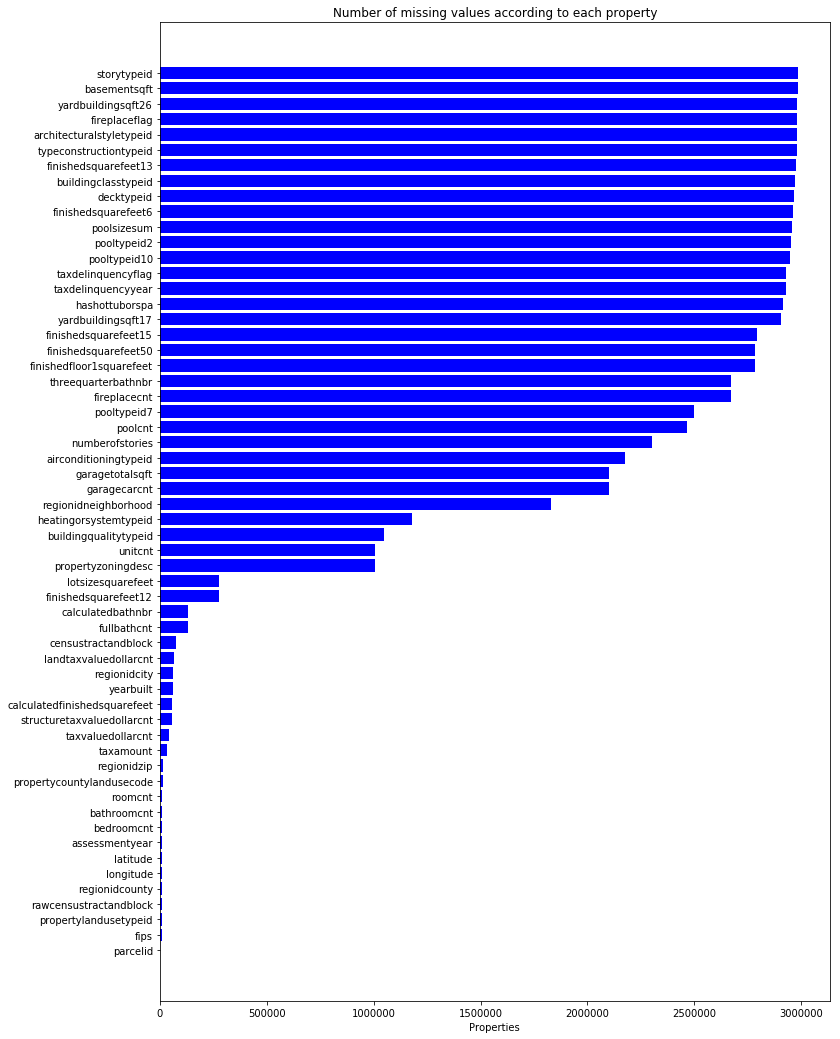

In [11]:
# import missingno as msno
# missingValueColumns = df_2016.columns[df_2016.isnull().any()].tolist()
# missingValueColumns
# msno.bar(df_2016_mv.columns,figsize=(20,8),color="#34495e",fontsize=12,labels=True,)
ind = np.arange(df_2016_mv.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, df_2016_mv['no_missing'].values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df_2016_mv['column_name'].values, rotation='horizontal')
ax.set_xlabel("Number of missing values")
ax.set_xlabel("Properties")
ax.set_title("Number of missing values according to each property")
plt.show()

In [12]:
# Missing values
df_2017_mv = df_2017.isnull().sum(axis=0).reset_index()
df_2017_mv.columns = ['column_name', 'no_missing']
df_2017_mv['missing_ratio'] = df_2017_mv['no_missing'] / df_2017.shape[0]
df_2017_mv.sort_values(by='no_missing',ascending=True, inplace=True)
df_2017_mv

,column_name,no_missing,missing_ratio
0,parcelid,0,0.000000
17,fips,2932,0.000982
33,propertylandusetypeid,2932,0.000982
35,rawcensustractandblock,2932,0.000982
37,regionidcounty,2932,0.000982
25,longitude,2932,0.000982
24,latitude,2932,0.000982
52,assessmentyear,2933,0.000983
5,bedroomcnt,2945,0.000987
4,bathroomcnt,2957,0.000991


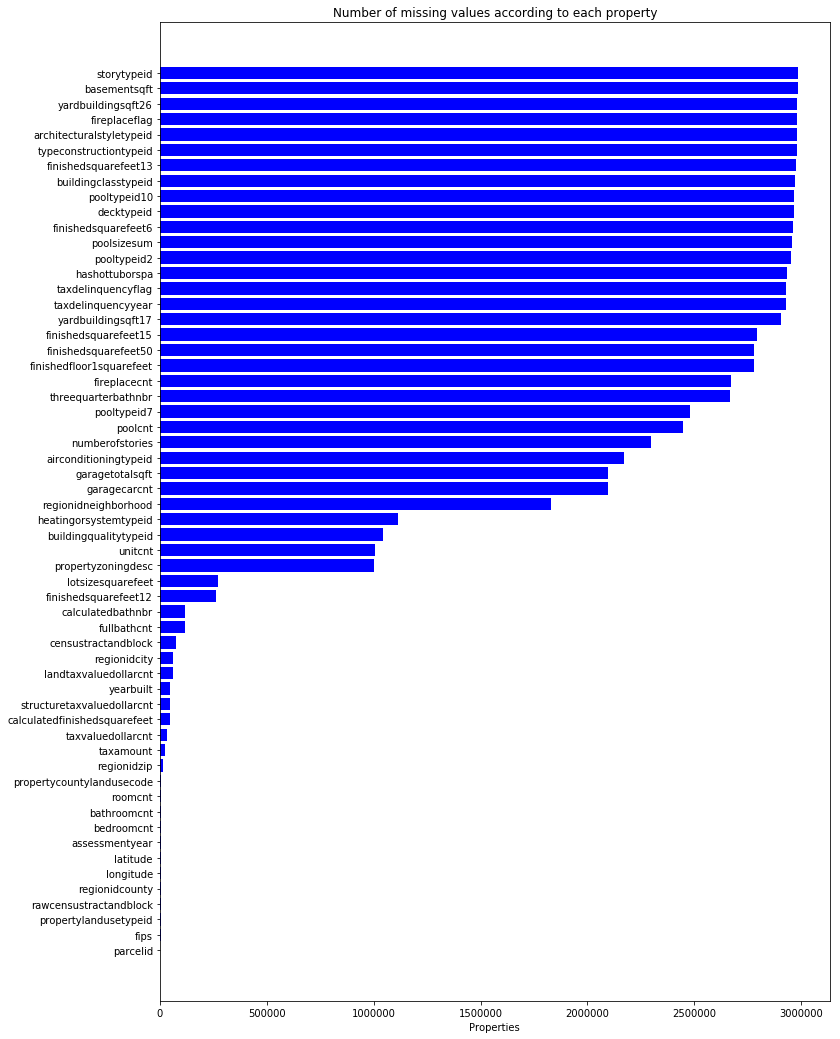

In [13]:
ind = np.arange(df_2017_mv.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, df_2017_mv['no_missing'].values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df_2017_mv['column_name'].values, rotation='horizontal')
ax.set_xlabel("Number of missing values")
ax.set_xlabel("Properties")
ax.set_title("Number of missing values according to each property")
plt.show()

In [14]:
######## Look at specific columns ########
# 'fips'
df_2016['fips'].value_counts()

6037.0    2009362
6059.0     741565
6111.0     222853
Name: fips, dtype: int64

In [15]:
df_2017['fips'].value_counts()

6037.0    2012741
6059.0     745800
6111.0     223744
Name: fips, dtype: int64

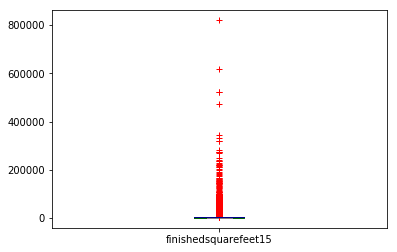

In [16]:
# 'finishedsquarefeet15'
plt.figure("Square feet box of 2016")
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
df_2016['finishedsquarefeet15'].plot.box(color=color, sym='r+')
plt.show()

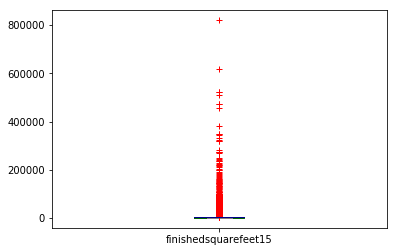

In [17]:
# Plot box for square feet of 2017
plt.figure("Square feet box of 2017")
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
df_2017['finishedsquarefeet15'].plot.box(color=color, sym='r+')
plt.show()

In [18]:
# Quantiles
df_2016['finishedsquarefeet12'].quantile([.0000001, .00001, .001, .1, .9, .999, .99999, .9999999])

1.000000e-07         1.000000
1.000000e-05        10.183660
1.000000e-03       390.000000
1.000000e-01       960.000000
9.000000e-01      2794.000000
9.990000e-01      8959.817000
9.999900e-01     44489.318420
9.999999e-01    253569.195442
Name: finishedsquarefeet12, dtype: float64

In [19]:
df_2017['finishedsquarefeet12'].quantile([.0000001, .00001, .001, .1, .9, .999, .99999, .9999999])

1.000000e-07         1.000000
1.000000e-05        10.415700
1.000000e-03       390.000000
1.000000e-01       960.000000
9.000000e-01      2800.000000
9.990000e-01      9028.000000
9.999900e-01     45243.444300
9.999999e-01    391732.193795
Name: finishedsquarefeet12, dtype: float64

In [20]:
df_train_2016.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [21]:
df_train_2017.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [22]:
df_train_2016.describe()

,parcelid,logerror
count,9.027500e+04,90275.000000
mean,1.298466e+07,0.011457
std,2.504510e+06,0.161079
min,1.071174e+07,-4.605000
25%,1.155950e+07,-0.025300
50%,1.254734e+07,0.006000
75%,1.422755e+07,0.039200
max,1.629608e+08,4.737000


In [23]:
df_train_2017.describe()

,parcelid,logerror
count,7.761300e+04,77613.000000
mean,1.300781e+07,0.016755
std,3.518717e+06,0.170887
min,1.071186e+07,-4.655420
25%,1.153821e+07,-0.024325
50%,1.253004e+07,0.006670
75%,1.421101e+07,0.039295
max,1.676893e+08,5.262999


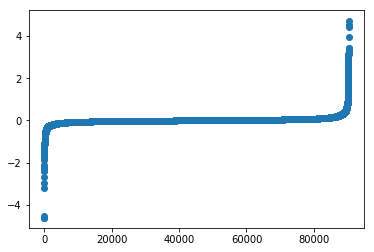

In [24]:
# Plot box for log error of training 2016
plt.figure("Log error scatter of 2016")
plt.scatter(range(df_train_2016['logerror'].shape[0]), np.sort(df_train_2016.logerror.values))
plt.show()

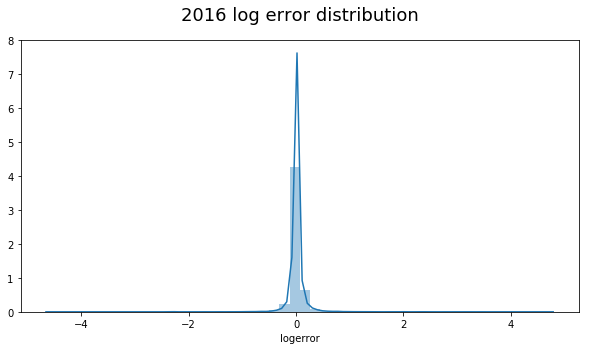

In [25]:
f, ax= plt.subplots(figsize = (10, 5))
ax.set_title('2016 log error distribution', fontsize=18, position=(0.5,1.05))
sns.distplot(df_train_2016['logerror'])
ax.tick_params(axis='x',labelsize=10)
plt.show()

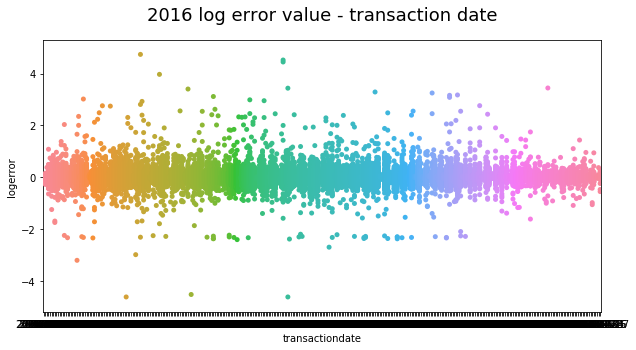

In [26]:
f, ax= plt.subplots(figsize = (10, 5))
ax.set_title('2016 log error value - transaction date', fontsize=18, position=(0.5,1.05))
sns.stripplot(x='transactiondate',y='logerror',data=df_train_2016)
plt.show()

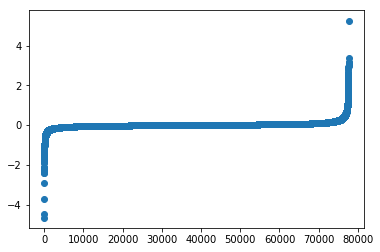

In [27]:
# Plot box for log error of training 2017
plt.figure("Log error box of 2017")
plt.scatter(range(df_train_2017['logerror'].shape[0]), np.sort(df_train_2017.logerror.values))
plt.show()

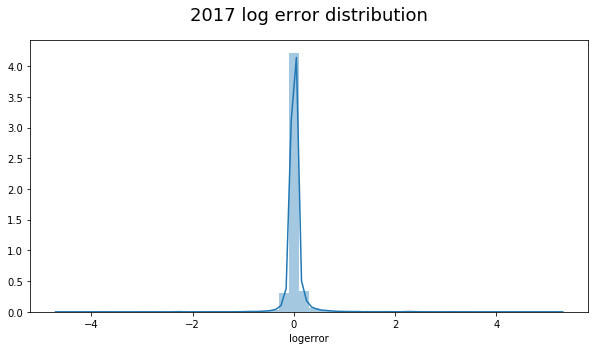

In [28]:
f, ax= plt.subplots(figsize = (10, 5))
ax.set_title('2017 log error distribution', fontsize=18, position=(0.5,1.05))
sns.distplot(df_train_2017['logerror'])
plt.show()

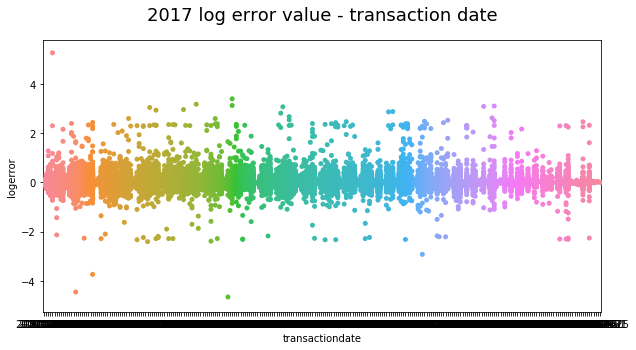

In [29]:
f, ax= plt.subplots(figsize = (10, 5))
ax.set_title('2017 log error value - transaction date', fontsize=18, position=(0.5,1.05))
sns.stripplot(x='transactiondate',y='logerror',data=df_train_2017)
plt.show()

In [30]:
# Concatenate properties
df_2016['year'] = 2016
df_2017['year'] = 2017
frames = [df_2016, df_2017]
properties = pd.concat(frames)
properties.drop_duplicates(subset='parcelid', inplace=True)

In [31]:
# Concatenate training set
df_train_2016['year'] = 2016
df_train_2017['year'] = 2017
frames = [df_train_2016, df_train_2017]
train = pd.concat(frames)
train.drop_duplicates(subset='parcelid', inplace=True)

In [32]:
# Find the overlap of "train" and "properties"
# which is the real useful data
ts = pd.merge(train, properties, how='left', on='parcelid')
ts.drop_duplicates(subset='parcelid', inplace=True)

In [33]:
print(ts.shape)
ts.head()

(165210, 62)


,parcelid,logerror,transactiondate,year_x,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,year_y
0,11016594,0.0276,2016-01-01,2016,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13,2016
1,14366692,-0.1684,2016-01-01,2016,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN,2016
2,12098116,-0.0040,2016-01-01,2016,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13,2016
3,12643413,0.0218,2016-01-02,2016,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13,2016
4,14432541,-0.0050,2016-01-02,2016,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13,2016


In [35]:
ts.to_csv('./Data/training_set_dirty.csv', index=None)

In [36]:
################################ End of EDA ################################

In [37]:
# Delete to save memory
import gc
del df_2016
del df_2017
del df_train_2016
del df_train_2017
del properties
del train
gc.collect()

8952

In [38]:
# plt.figure(figsize=(12,12))
# sns.jointplot(x=ts.latitude.values, y=ts.longitude.values, size=10)
# plt.ylabel('Longitude', fontsize=12)
# plt.xlabel('Latitude', fontsize=12)
# plt.show()